<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/19_ClusteringGerarchico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering gerarchico agglomerativo
In questo notebook implementiamo l'algoritmo di clustering gerarchico agglomerativo, utilizzando la libreria `scipy`, applicato ad un dataset contenente $m=200$ osservazioni relative a clienti di un centro commerciale (per semplicità di visualizzazione grafica, utilizziamo solo le prime 20 osservazioni del dataset).

Il dataset contiene, oltre agli ID dei clienti, altre 4 feature, di cui 3 numeriche ('Age', 'Annual Income (k$)', 'Spending Score (1-100)') e 1 categorica ('Gender').

Consideriamo solo le feature numeriche e utilizziamo la distanza euclidea come distanza tra singole osservazioni e il criterio di Ward come criterio di linkage per la distanza tra cluster.

In [1]:
# "Montiamo" il drive per poter accedere al file
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import os

# Percorso alla directory che contiene i file da utilizzare
# Percorso da modificare in base alla propria macchina
folder_path = '/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/FileDiSupporto'

Mounted at /content/drive


In [6]:
import pandas as pd

file_path_csv = os.path.join(folder_path, 'Mall_Customers.csv')

# leggiamo il dataset (solo le prime 20 righe, per semplicità di visualizzazione)
data_completo = pd.read_csv(file_path_csv, header=0, usecols=['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']).head(20)
data = data_completo[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

print(data)

    Age  Annual Income (k$)  Spending Score (1-100)
0    19                  15                      39
1    21                  15                      81
2    20                  16                       6
3    23                  16                      77
4    31                  17                      40
5    22                  17                      76
6    35                  18                       6
7    23                  18                      94
8    64                  19                       3
9    30                  19                      72
10   67                  19                      14
11   35                  19                      99
12   58                  20                      15
13   24                  20                      77
14   37                  20                      13
15   22                  20                      79
16   35                  21                      35
17   20                  21                      66
18   52     

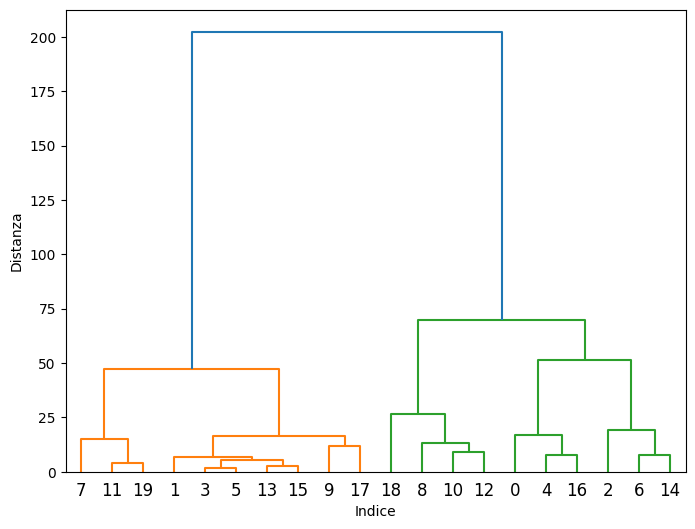

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Eseguiamo l'algoritmo di clustering gerarchico agglomerativo
linkage_data = linkage(data, method='ward', metric='euclidean')

# Visualizziamo il dendrogramma
plt.figure(figsize=(8, 6))
plt.xlabel('Indice')
plt.ylabel('Distanza')
dendrogram(linkage_data)

plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster

# Definiamo una soglia di distanza a cui "tagliare" il dendrogramma
threshold = 30

# Ottieniamo i cluster: criterion='distance' taglia in base alla soglia di distanza
clusters = fcluster(linkage_data, t=threshold, criterion='distance')

# Raggruppiamo gli indici per cluster e stampiamo
data_copy = data.copy()
data_copy['cluster'] = clusters
print("Cluster relativi ad una data soglia = ", threshold, ":")
for cluster_id, group in data_copy.groupby('cluster'):
  print(f"Cluster {cluster_id}: {group.index.tolist()}")
print("\n")

# Se, invece, vogliamo ottenere esattamente K cluster, usiamo criterion='maxclust'
K = 3
clusters = fcluster(linkage_data, t=K, criterion='maxclust')

# Raggruppiamo gli indici per cluster e stampiamo
data_copy_2 = data.copy()
data_copy_2['cluster'] = clusters  # Aggiungi i cluster al DataFrame
print("Cluster relativi ad un numero fissato K = ", K, ":")
for cluster_id, group in data_copy_2.groupby('cluster'):
  print(f"Cluster {cluster_id}: {group.index.tolist()}")

Cluster relativi ad una data soglia =  30 :
Cluster 1: [7, 11, 19]
Cluster 2: [1, 3, 5, 9, 13, 15, 17]
Cluster 3: [8, 10, 12, 18]
Cluster 4: [0, 4, 16]
Cluster 5: [2, 6, 14]


Cluster relativi ad un numero fissato K =  3 :
Cluster 1: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
Cluster 2: [8, 10, 12, 18]
Cluster 3: [0, 2, 4, 6, 14, 16]


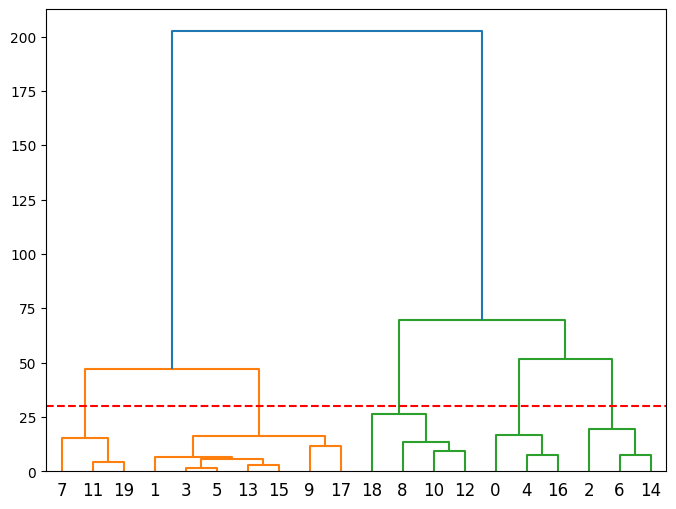

In [ ]:
# Visualizziamo il dendrogramma con il taglio in corrispondenza di threshold
plt.figure(figsize=(8, 6))
dendrogram(linkage_data)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()